On importe le DataSet

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('spam_and_ham_classification.csv', encoding='ISO-8859-1')
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^...,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1
...,...,...,...,...,...
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014ï»¿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1


On nettoie le DataSet

In [129]:
df.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis = 1, inplace = True)
# We rename the colums
df.rename(columns={"CLASS":"result","CONTENT":"message"}, inplace=True)
# Remarque : inplace=True sert à update le DataSet

# Let's visualise our dataset
#df.plot.hist()
df.replace("ham",0,inplace=True)
df.replace("spam",1,inplace=True)
df = df.dropna()
df

,message,result
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^...,1
4,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1
...,...,...
345,How can this have 2 billion views when there's...,0
346,I don't now why I'm watching this in 2014ï»¿,0
347,subscribe to me for call of duty vids and give...,1
348,hi guys please my android photo editor downloa...,1


Quelques visualisations 

array([[<Axes: title={'center': 'result'}>]], dtype=object)

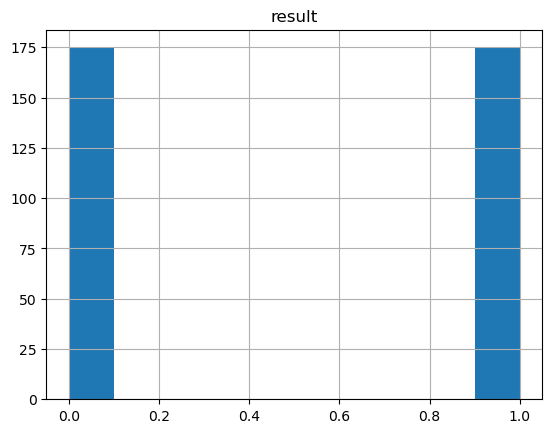

In [130]:
df.hist()

Analysons le top 10 des mots les plus présents

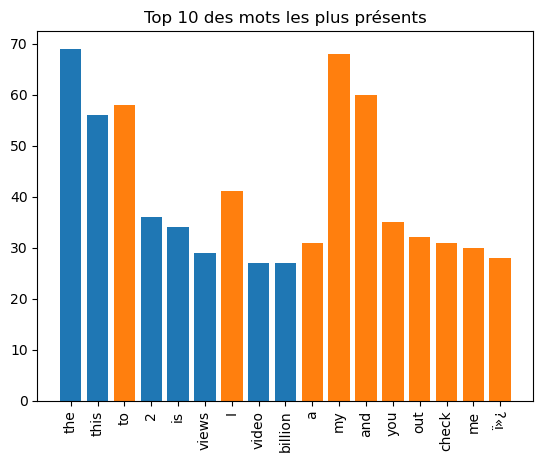

In [ ]:
# Les Stops words sont logiquement les mots les + présents
from collections import Counter
def mostCommon(data):
    words=[]
    for sentence in data:
        for word in sentence.split():
            words.append(word)e
    words

    liste = Counter(words).most_common(10)
    liste
    word = [word for word,_ in liste]
    nb = [nb for _,nb in liste]
    plt.xticks(rotation=90)
    plt.title("Top 10 des mots les plus présents")
    plt.bar(word,nb)
#dataSpam = train.loc[train["result"] == 1]['message']
#dataHam = train.loc[train["result"] == 0]['message']
ham = df[df["result"]==0]["message"]
spam = df[df["result"]==1]["message"]
mostCommon(ham)
mostCommon(spam)


Enlevons les stop-words (+ Lemming ...)

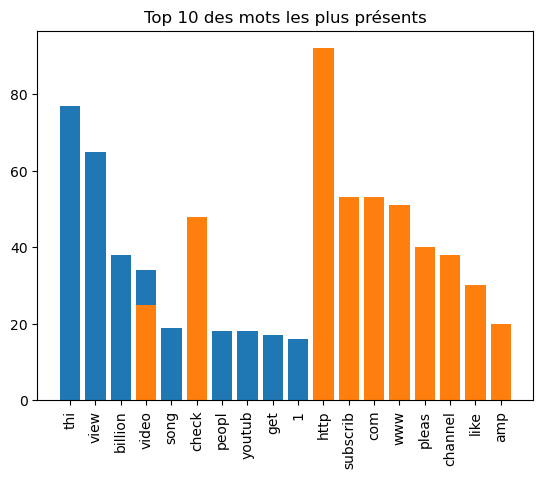

In [132]:
import nltk
from nltk.stem.porter import PorterStemmer
import string

def data_preprocessing(data):
  """
  Fonction de prétraitement de base: 
  - Suppression de ponctuation
  - Conversion en minuscules
  - Suppression des caractères spéciaux
  - Stemming
  """
  processed_data = list()
  punctuation = set(string.punctuation)
  stemmer = PorterStemmer()
  
  for doc in data:
    # Remove punctuation and lowercase
    processed_doc = ''.join([w if w not in punctuation else ' ' for w in doc.lower()])
    
    # Split into words
    processed_doc = processed_doc.split()
    
    # Remove unwanted characters
    processed_doc = [mot for mot in processed_doc if not mot.startswith("ï»¿")]
    
    # Stemming
    processed_doc = [stemmer.stem(w) for w in processed_doc]
    
    # Convert list of words to one string
    processed_doc = ' '.join(w for w in processed_doc)
    
    processed_data.append(processed_doc)
  
  return processed_data

def remove_stopwords(data):
  """
  Fonction pour supprimer les stopwords des données déjà prétraitées
  """
  # List of stopwords
  stopwords = ['2','u','m','ur','gt','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
              'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
              'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
              'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
              'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
              'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
              'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
              'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
              'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
              'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
              'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
              'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now','br']
  
  filtered_data = []
  for doc in data:
    words = doc.split()
    filtered_doc = [w for w in words if w not in stopwords]
    filtered_doc = ' '.join(filtered_doc)
    filtered_data.append(filtered_doc)
  
  return filtered_data

# 1. Prétraitement de base
df["message"] = data_preprocessing(df["message"])

# 2. Suppression des stopwords (optionnel)
df_no_stopwords = df
df_no_stopwords["message"] = remove_stopwords(df["message"])

# 3. Séparation ham/spam
ham = df_no_stopwords[df_no_stopwords["result"]==0]["message"]
spam = df_no_stopwords[df_no_stopwords["result"]==1]["message"]

# 4. Analyse des mots les plus fréquents
mostCommon(ham)
mostCommon(spam)

On construit + on teste notre modèle sans retirer les stop-words

In [133]:
# On test les phrases avant de retirer les stop-words

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Supposons que ton DataFrame 'df' est déjà chargé et contient les colonnes "message" et "result"

# 1. Vectorisation du texte (ENTRAÎNEMENT du vectoriseur sur TOUT le dataset)
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(df["message"])

# 2. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_vec, df["result"], test_size=0.5, random_state=42)

# 3. Initialisation et entraînement du classifieur
nb = MultinomialNB()
nb.fit(X_train, y_train)

# 4. Phrase de test contenant "free"
phrase_test = ["free phone !"]
print(f"\nPhrase de test : {phrase_test[0]}")

# 5. Prétraite (vectorise) la phrase de test avec le VECTORIZER DÉJÀ ENTRAÎNÉ
X_phrase_test_vec = vectorizer.transform(phrase_test)

# 6. Fais la prédiction
prediction = nb.predict(X_phrase_test_vec)
print(f"Prédiction du modèle : {prediction[0]}")

# 7. Affiche les probabilités
probabilities = nb.predict_proba(X_phrase_test_vec)
print(f"Probabilités (Non-spam, Spam): {probabilities[0]}")

# (Reste de ton code d'évaluation sur l'ensemble du test set)
print("\n--- Évaluation sur l'ensemble du jeu de test ---")
y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nRapport de classification:")
print(classification_report(y_test, y_pred, target_names=["Non-spam", "Spam"]))
print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred))


Phrase de test : free phone !
Prédiction du modèle : 1
Probabilités (Non-spam, Spam): [0.24355301 0.75644699]

--- Évaluation sur l'ensemble du jeu de test ---
Accuracy: 0.9428571428571428

Rapport de classification:
              precision    recall  f1-score   support

    Non-spam       0.95      0.93      0.94        84
        Spam       0.94      0.96      0.95        91

    accuracy                           0.94       175
   macro avg       0.94      0.94      0.94       175
weighted avg       0.94      0.94      0.94       175


Matrice de confusion:
[[78  6]
 [ 4 87]]


On affiche les 10 mots ayant la probabilité la plus élevé

In [134]:
import numpy as np
def afficher_mots_importants_par_classe(model, vectorizer, n_top_words: int = 10):
    """
    Affiche les n mots les plus importants pour chaque classe dans un modèle
    Naive Bayes multinomial.

    Args:
        model: Un modèle Naive Bayes multinomial entraîné (e.g., MultinomialNB).
        vectorizer: Le vectoriseur utilisé pour transformer les données (e.g., CountVectorizer, TfidfVectorizer).
        n_top_words: Le nombre de mots les plus importants à afficher pour chaque classe (par défaut: 10).
    """
    class_names = model.classes_
    feature_names = vectorizer.get_feature_names_out()

    for i, class_label in enumerate(class_names):
        feature_log_probs = model.feature_log_prob_[i]
        feature_probs = np.exp(feature_log_probs)
        top_feature_indices = feature_probs.argsort()[::-1][:n_top_words]

        print(f"\nClasse: {class_label}")
        print(f"Mots les plus importants et leurs probabilités:")

        for idx in top_feature_indices:
            if idx < len(feature_names):
                word = feature_names[idx]
                prob = feature_probs[idx]
                print(f"  {word}: {prob:.5f}")
            else:
                print(f"  ERREUR: Index {idx} hors des limites du vocabulaire ({len(feature_names)})")
afficher_mots_importants_par_classe(nb, vectorizer, n_top_words=10) # Tu peux ajuster le nombre de mots à afficher


Classe: 0
Mots les plus importants et leurs probabilités:
  view: 0.01798
  thi: 0.01598
  billion: 0.01149
  ï¼: 0.00999
  video: 0.00949
  youtub: 0.00649
  check: 0.00549
  000: 0.00450
  onli: 0.00450
  get: 0.00450

Classe: 1
Mots les plus importants et leurs probabilités:
  http: 0.02479
  www: 0.01134
  check: 0.01092
  com: 0.01050
  subscrib: 0.01008
  ru: 0.00882
  48051: 0.00882
  image2y: 0.00882
  channel: 0.00714
  like: 0.00672


On test en ayant retiré les stop-words + on affiche les 10 mots ayant la probabilité la plus élevé

In [135]:
# On test les phrases en ayant retiré les stop-words

# Vectorisation du texte
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(
    data_preprocessing(df_no_stopwords["message"])
)

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_vec, df_no_stopwords["result"], test_size=0.2, random_state=42)

# Initialisation du classifieur
nb2 = MultinomialNB()

# Entraînement
nb2.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = nb2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Rapport de classification détaillé (precision, recall, f1-score)
print("\nRapport de classification:")
print(classification_report(y_test, y_pred, target_names=["Non-spam", "Spam"]))

# Matrice de confusion
print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred))

# Afficher les mots les plus importants par classe pour le modèle entraîné sans stop-words
print("\n--- Mots les plus importants par classe (sans stop-words) ---")
afficher_mots_importants_par_classe(nb2, vectorizer, n_top_words=10)

Accuracy: 0.9571428571428572

Rapport de classification:
              precision    recall  f1-score   support

    Non-spam       0.96      0.93      0.94        27
        Spam       0.95      0.98      0.97        43

    accuracy                           0.96        70
   macro avg       0.96      0.95      0.95        70
weighted avg       0.96      0.96      0.96        70


Matrice de confusion:
[[25  2]
 [ 1 42]]

--- Mots les plus importants par classe (sans stop-words) ---

Classe: 0
Mots les plus importants et leurs probabilités:
  thi: 0.02738
  view: 0.02452
  billion: 0.01430
  video: 0.01226
  ï¼: 0.00817
  youtub: 0.00776
  check: 0.00736
  get: 0.00695
  onli: 0.00654
  song: 0.00613

Classe: 1
Mots les plus importants et leurs probabilités:
  http: 0.02513
  subscrib: 0.01426
  check: 0.01358
  www: 0.01290
  com: 0.01188
  channel: 0.01121
  plea: 0.01019
  video: 0.00815
  like: 0.00815
  image2i: 0.00713


In [136]:
# On remarque que la précision est la même avec ou sans stopwords. Donc les stopwords n'apporte rien à l'experience => On peut les supprimer. 
# Les mots importants correspondent à ce qu'on peut attendre d'un spam

df = df_no_stopwords

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer


# ====== 1. TF-IDF Vectorisation ======
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(data_preprocessing(df["message"]))

# ====== 2. On repère les colonnes associées aux mots de la liste ======
liste_mots_spam = [
    "free", "winner", "cash", "prize", "million", "credit", "earn", "urgent", "guarantee",
    "investment", "save", "risk-free", "trial", "exclusive", "instant", "order now",
    "bonus", "discount", "cheap", "luxury", "click here", "buy now", "limited offer", "act now",
    "dear friend", "important information", "money back", "fast cash", "no obligation"
]

feature_names = vectorizer.get_feature_names_out()

# Trouver les indices des mots spam
spam_word_indices = [i for i, word in enumerate(feature_names) if word in liste_mots_spam]

# ====== 3. Boost spécial sur ces mots ======
# (On multiplie par un facteur > 1)
X_vec_boosted = X_vec.copy()
boost_factor = 5   # tu peux ajuster ce boost !

for idx in spam_word_indices:
    X_vec_boosted[:, idx] = X_vec_boosted[:, idx] * boost_factor

# ====== 4. Split train/test ======
X_train, X_test, y_train, y_test = train_test_split(X_vec_boosted, df["result"], test_size=0.2, random_state=42)

# ====== 5. Train le modèle ======
nb = MultinomialNB()
nb.fit(X_train, y_train)

# ====== 6. Évaluation ======
y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Rapport de classification détaillé (precision, recall, f1-score)
print("\nRapport de classification:")
print(classification_report(y_test, y_pred, target_names=["Non-spam", "Spam"]))

# Matrice de confusion
print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred))

# Afficher les mots les plus importants par classe pour le modèle entraîné avec TF-IDF et boost
print("\n--- Mots les plus importants par classe (TF-IDF avec boost) ---")
afficher_mots_importants_par_classe(nb, vectorizer, n_top_words=10)

# ====== 7. Test avec la phrase "free" ======
phrase_test = ["free iPhone click here now!"]
print(f"\nPhrase de test : {phrase_test[0]} (Avec TF-IDF et boost)")

# Prétraite (vectorise) la phrase de test avec le VECTORIZER ENTRAÎNÉ
phrase_test_pretraitee = data_preprocessing(phrase_test)
X_phrase_test_vec = vectorizer.transform(phrase_test_pretraitee)

# Applique le même boost aux mots spam dans le vecteur de la phrase de test
X_phrase_test_vec_boosted = X_phrase_test_vec.copy()
for idx in spam_word_indices:
    if idx < X_phrase_test_vec_boosted.shape[1]:  # Vérifie si l'index est dans les limites
        X_phrase_test_vec_boosted[:, idx] = X_phrase_test_vec_boosted[:, idx] * boost_factor

# Fais la prédiction avec le modèle entraîné sur les données boostées
prediction_boosted = nb.predict(X_phrase_test_vec_boosted)
print(f"Prédiction du modèle (TF-IDF avec boost) : {prediction_boosted[0]}")

# Affiche les probabilités
probabilities_boosted = nb.predict_proba(X_phrase_test_vec_boosted)
print(f"Probabilités (Non-spam, Spam) (TF-IDF avec boost): {probabilities_boosted[0]}")

Accuracy: 0.9428571428571428

Rapport de classification:
              precision    recall  f1-score   support

    Non-spam       0.93      0.93      0.93        27
        Spam       0.95      0.95      0.95        43

    accuracy                           0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.94      0.94      0.94        70


Matrice de confusion:
[[25  2]
 [ 2 41]]

--- Mots les plus importants par classe (TF-IDF avec boost) ---

Classe: 0
Mots les plus importants et leurs probabilités:
  view: 0.00876
  thi: 0.00772
  million: 0.00683
  billion: 0.00669
  video: 0.00435
  youtub: 0.00354
  check: 0.00345
  onli: 0.00307
  song: 0.00303
  get: 0.00298

Classe: 1
Mots les plus importants et leurs probabilités:
  subscrib: 0.00713
  channel: 0.00628
  http: 0.00533
  check: 0.00533
  free: 0.00506
  com: 0.00441
  plea: 0.00402
  www: 0.00400
  video: 0.00295
  like: 0.00282

Phrase de test : free iPhone click here now! (Avec TF-I

In [138]:
# On retrouve une précision légèrement plus basse. Cela est probablement du au fait qu'il y'ai des cas spéciaux de spams qui ne sont pas boostés.